In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import DBSCAN
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [2]:
xtrain = pd.read_csv("X_train.csv")
xtrain = xtrain.iloc[:, 1:]
xtest = pd.read_csv("X_test.csv")
xtest = xtest.iloc[:, 1:]
ytrain = pd.read_csv("Y_train.csv")

xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,NaN,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,NaN,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,NaN
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,NaN,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,NaN,1.930136


In [3]:
xtrain.shape

(1212, 832)

In [4]:
# Get a feeling for amount of missing values
xtrain.iloc[:,0:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 10 columns):
x0    1131 non-null float64
x1    1109 non-null float64
x2    1120 non-null float64
x3    1121 non-null float64
x4    1120 non-null float64
x5    1109 non-null float64
x6    1115 non-null float64
x7    1141 non-null float64
x8    1107 non-null float64
x9    1115 non-null float64
dtypes: float64(10)
memory usage: 94.8 KB


In [5]:
# Treat missing values as column means

xtrain = xtrain.fillna(xtrain.mean())
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,99950.259599,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,10.018963,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,2.273542
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,10.549044,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,104996.343999,1.930136


In [16]:
# Scale the training and test data

scaler = preprocessing.StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain_scaled, columns = xtrain.columns)
xtrain.head()

xtest_scaled = scaler.fit_transform(xtest)
xtest = pd.DataFrame(xtest_scaled, columns = xtest.columns)

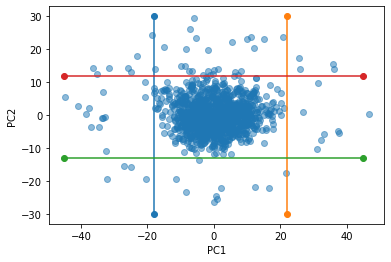

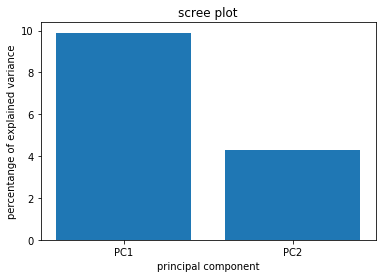

[0.09869328 0.04271685]


In [9]:
# IGNORE
# PCA with 2 remaining features/components

pca = PCA(n_components=2)
principal_components = pca.fit_transform(xtrain)
xpca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

plt.scatter(xpca['PC1'], xpca['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.plot([-18, -18], [-30, 30], marker='o')
plt.plot([22, 22], [-30, 30], marker='o')
plt.plot([-45, 45], [-13, -13], marker='o')
plt.plot([-45, 45], [12, 12], marker='o')
plt.show()


per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

print(pca.explained_variance_ratio_)

In [10]:
# Highly ad hoc way of removing outliers based on PCA plot above

outliers = (xpca['PC1'] <= 22) & (xpca['PC1'] >= -18) & (xpca['PC2'] <= 12) & (xpca['PC2'] >= -13)
np.count_nonzero(outliers)
xtrain_without_outliers = xtrain[outliers]
ytrain_without_outliers = ytrain[outliers]
xtrain_without_outliers.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,2.003789e+00,-0.655849,-1.886600,0.916929,1.455717,-0.393113,1.842526,0.207068,-1.112314,0.276588,...,0.819901,-1.110028e+00,0.251549,0.313682,0.905023,0.745790,-0.944838,8.892476e-01,9.233435e-01,1.579906e-01
1,3.170291e-15,2.403925,-0.216914,1.232632,2.267203,-0.214877,-1.736539,-1.383793,1.477503,0.468797,...,1.152094,-1.683506e+00,-0.103563,-0.034465,0.101094,0.478006,2.612417,-7.499671e-15,1.029284e+00,1.226602e+00
2,-4.986002e-01,2.848202,-0.706509,0.368077,1.688041,1.457136,1.636103,-1.578900,-0.123474,0.430067,...,-0.701345,-1.271165e-01,-0.026331,-1.110000,0.760386,-0.887858,0.648457,2.731569e-01,-5.722800e-01,1.093697e-14
3,5.572892e-01,-0.463420,2.104230,1.205696,2.220190,-0.074959,0.461499,-0.993009,1.754213,1.232371,...,0.232337,1.617028e+00,1.253338,-1.441711,-1.586810,1.421010,-0.207350,-7.190751e-01,2.628537e-01,1.301543e+00
4,-1.081925e-01,0.523514,-0.291240,0.523456,0.432765,0.221201,-0.847238,1.384981,-0.569382,0.211873,...,-0.547710,-7.135373e-14,-1.409453,0.416555,0.142690,-1.260314,-1.072150,2.298233e+00,-2.105964e-14,-2.114335e+00


In [11]:
# Run random forest to select features

sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
sel.fit(xtrain_without_outliers, ytrain_without_outliers)
sel.get_support()

array([ True, False,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False,  True,  True, False,  True,
        True, False, False, False,  True, False,  True, False,  True,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False,  True,  True,  True, False,  True, False,
       False,  True, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True,  True,

In [17]:
# Select appropriate features for new dataframe

# np.count_nonzero(sel.get_support())

selected_feat = xtrain_without_outliers.columns[(sel.get_support())]
xtrain_without_outliers_RF = xtrain_without_outliers.loc[:,selected_feat]
xtest_RF = xtest.loc[:,selected_feat]
xtrain_without_outliers_RF.head()

,x0,x2,x3,x5,x6,x8,x10,x11,x13,x14,...,x816,x818,x819,x821,x824,x825,x826,x827,x829,x830
0,2.003789e+00,-1.886600,0.916929,-0.393113,1.842526,-1.112314,1.408577,-0.736072,0.798808,4.711032e-02,...,-0.380652,1.130230e+00,1.480129,-7.041406e-03,0.251549,0.313682,0.905023,0.745790,8.892476e-01,9.233435e-01
1,3.170291e-15,-0.216914,1.232632,-0.214877,-1.736539,1.477503,-1.018184,-0.384914,0.876085,-4.022581e-01,...,1.594495,1.373773e-14,-1.314220,3.612492e-15,-0.103563,-0.034465,0.101094,0.478006,-7.499671e-15,1.029284e+00
2,-4.986002e-01,-0.706509,0.368077,1.457136,1.636103,-0.123474,0.428261,1.996995,-0.999857,-1.148263e+00,...,1.532391,6.874894e-01,-0.115127,9.373678e-01,-0.026331,-1.110000,0.760386,-0.887858,2.731569e-01,-5.722800e-01
3,5.572892e-01,2.104230,1.205696,-0.074959,0.461499,1.754213,-0.697834,-0.356636,0.939073,4.512638e-15,...,-0.621358,4.664480e-01,-0.112546,4.557322e-01,1.253338,-1.441711,-1.586810,1.421010,-7.190751e-01,2.628537e-01
4,-1.081925e-01,-0.291240,0.523456,0.221201,-0.847238,-0.569382,-0.867819,1.254977,-0.725970,-8.662420e-01,...,0.811482,1.373773e-14,-1.638298,1.092801e+00,-1.409453,0.416555,0.142690,-1.260314,2.298233e+00,-2.105964e-14


In [19]:
# Try a linear regression on these features with outliers removed with PCA method

reg_model = LinearRegression()
reg_model.fit(xtrain_without_outliers_RF, ytrain_without_outliers)

# Fill in missing values as mean
xtest_RF = xtest_RF.fillna(xtest_RF.mean())

y_pred = reg_model.predict(xtest_RF)

In [35]:
index = pd.read_csv("sample.csv")
index.head()
index['y'] = y_pred[:,1]
index.head()
index.to_csv("predictions.csv")

In [36]:
# Random forest again

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(xtrain_without_outliers_RF, ytrain_without_outliers)
sel.get_support()

array([ True,  True, False, False, False, False,  True,  True, False,
        True, False,  True, False, False,  True, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
        True,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True,

In [37]:
# Select features for df again

selected_feat = xtrain_without_outliers_RF.columns[(sel.get_support())]
xtrain_without_outliers_RF2 = xtrain_without_outliers_RF.loc[:,selected_feat]
xtest_RF2 = xtest_RF.loc[:,selected_feat]
xtrain_without_outliers_RF2.head()

,x0,x2,x10,x11,x14,x18,x24,x37,x39,x41,...,x773,x782,x787,x791,x794,x801,x809,x814,x816,x825
0,2.003789e+00,-1.886600,1.408577,-0.736072,4.711032e-02,3.281678e-01,0.376055,-1.026995,-0.560090,-0.080355,...,0.633884,0.651819,1.539246,0.163994,-0.762699,0.415885,5.489406e-16,0.167924,-0.380652,0.313682
1,3.170291e-15,-0.216914,-1.018184,-0.384914,-4.022581e-01,-6.116587e-15,0.000000,0.061051,1.292454,-1.122602,...,-0.104768,0.989155,0.555404,0.649498,0.367144,-0.655561,5.489406e-16,-1.427364,1.594495,-0.034465
2,-4.986002e-01,-0.706509,0.428261,1.996995,-1.148263e+00,-2.101050e-01,-1.972749,0.360240,-1.248835,0.045547,...,0.140288,0.584193,1.101161,0.173387,0.396022,1.776119,6.952155e+00,1.746492,1.532391,-1.110000
3,5.572892e-01,2.104230,-0.697834,-0.356636,4.512638e-15,3.128715e-01,2.000645,1.000766,0.709561,0.736116,...,1.239880,0.898630,0.055772,0.388562,0.781972,0.152103,1.308535e-01,0.133475,-0.621358,-1.441711
4,-1.081925e-01,-0.291240,-0.867819,1.254977,-8.662420e-01,1.826061e-01,-1.175665,0.047107,-0.627111,1.718358,...,0.715285,-0.451640,1.154679,-0.305866,1.422301,-1.035144,1.556122e+00,0.303210,0.811482,0.416555


In [38]:
xtrain_without_outliers_RF2.shape

(1139, 196)

In [40]:
# Try a linear regression on these features with outliers removed with PCA method (AGAIN)

reg_model = LinearRegression()
reg_model.fit(xtrain_without_outliers_RF2, ytrain_without_outliers)

y_pred = reg_model.predict(xtest_RF2)
y_pred

array([[675.58955349,  67.6342441 ],
       [869.50040595,  76.34641447],
       [569.39681958,  86.22371938],
       ...,
       [601.53001501,  78.47546386],
       [723.80184063,  66.85009264],
       [675.01999484,  66.60895593]])

In [41]:
index = pd.read_csv("sample.csv")
index.head()
index['y'] = y_pred[:,1]
index.head()
index.to_csv("predictions.csv")

In [95]:
#Convert to array
xtrain_without_outliers_RF2_arr = xtrain_without_outliers_RF2.values
ytrain_without_outliers_arr = ytrain_without_outliers.values

kf = KFold(n_splits=10, shuffle = True)

alphas = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
meanscores = []
for i in alphas:
    scores = []
    for train_index, test_index in kf.split(xtrain_without_outliers_RF2_arr):
        X_train = xtrain_without_outliers_RF2_arr[train_index]
        X_test = xtrain_without_outliers_RF2_arr[test_index]
        y_train = ytrain_without_outliers_arr[train_index]
        y_test = ytrain_without_outliers_arr[test_index]
        
        clf = Ridge(alpha=i)
        clf.fit(X_train, y_train)
        Y_pred = clf.predict(X_test)
        scores.append(r2_score(y_test, Y_pred))
        
    meanscores.append(np.mean(scores))

meanscores

[0.09678430863980143,
 0.11514872364922273,
 0.1345197674752714,
 0.12530447364016772,
 0.09964260067864354,
 0.1152423036597698,
 0.12005443393809787,
 0.11486675699427111,
 0.11761893511698684,
 0.12757964610259634,
 0.13305007929276425,
 0.17651338065409822,
 0.19694058046865587,
 0.24039481637697238,
 0.22993533444439967,
 0.18705719715103436]

In [65]:
model = RandomForestRegressor(n_estimators = 500).fit(y = ytrain_without_outliers, X = xtrain_without_outliers)
scores = cross_val_score(estimator = model, X = xtrain_without_outliers, y = ytrain_without_outliers,
                         scoring = 'r2', cv = 10) 
print("Mean Validation score {}".format(np.mean(scores)))
print("Std Validation score {}".format(np.std(scores)))

NameError: name 'cross_val_score' is not defined

In [64]:
# IGNORE
# PCA with more PC's

pca = PCA(n_components=100)
principal_components = pca.fit_transform(xtrain_scaled)
print(pca.explained_variance_ratio_)

[0.09869328 0.04271685 0.01002965 0.00832936 0.00676061 0.00610477
 0.00572094 0.00478307 0.00458512 0.00410277 0.00389032 0.00370189
 0.00358116 0.00355205 0.00353074 0.00345958 0.00344656 0.00341194
 0.00338798 0.00336516 0.00335068 0.00332545 0.00330704 0.00329179
 0.00325972 0.00323451 0.00321422 0.00319979 0.00318385 0.00316625
 0.00315776 0.00312593 0.00310481 0.0030889  0.0030684  0.00304852
 0.00303571 0.00301466 0.00298921 0.00298126 0.00297036 0.00296219
 0.00293459 0.00292703 0.00291045 0.00288832 0.00287955 0.00285896
 0.00284865 0.00282904 0.00282211 0.00281752 0.00278729 0.00277112
 0.00275815 0.00274447 0.00274044 0.00271808 0.00270057 0.00268437
 0.00267871 0.00266346 0.0026527  0.00263163 0.00261803 0.00260673
 0.00259161 0.00258961 0.00257873 0.00256672 0.0025495  0.00254265
 0.00253481 0.00252258 0.00249778 0.00248679 0.00246584 0.00244785
 0.0024358  0.00243263 0.00241796 0.0024055  0.00238077 0.0023673
 0.00235606 0.00233918 0.00233195 0.00231122 0.00229754 0.00229

In [31]:
# Tried another outlier detection technique but difficult to tune parameters

clustering = DBSCAN(eps=1, min_samples=10).fit(xtrain_scaled)
np.count_nonzero(clustering.labels_ == -1)

1212

In [ ]:
### NEW TRY, RUN FROM HERE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import DBSCAN
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

In [2]:
xtrain = pd.read_csv("X_train.csv")
xtrain = xtrain.iloc[:, 1:]
xtest = pd.read_csv("X_test.csv")
xtest = xtest.iloc[:, 1:]
ytrain = pd.read_csv("Y_train.csv")

xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,NaN,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,NaN,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,NaN
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,NaN,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,NaN,1.930136


In [3]:
# Treat missing values as column medians. Important (apparently) to use the medians from the training set in the test set

xtrain = xtrain.fillna(xtrain.mean())
xtest = xtest.fillna(xtrain.mean())
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,99950.259599,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,10.018963,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,2.273542
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,10.549044,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,104996.343999,1.930136


In [4]:
# Scale the training and test data

scaler = preprocessing.StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain_scaled, columns = xtrain.columns)
xtrain.head()

xtest_scaled = scaler.fit_transform(xtest)
xtest = pd.DataFrame(xtest_scaled, columns = xtest.columns)

In [5]:
#Remove unnecessary id column from ytrain that just ***** things up

ytrain1 = ytrain.loc[:, "y"]
ytrain2 = pd.DataFrame(data = ytrain1.values, columns= ['y'])
#ytrain2.head()
ytrain = ytrain2
ytrain.head()

,y
0,75.0
1,53.0
2,78.0
3,65.0
4,86.0


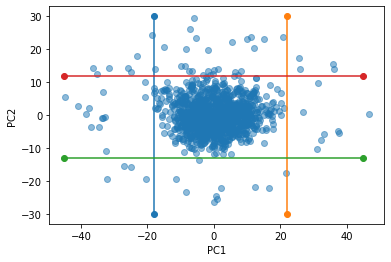

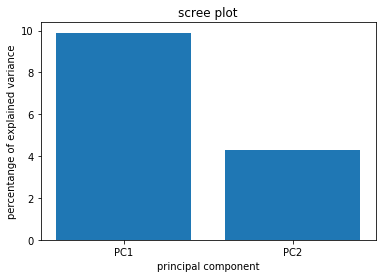

[0.09869328 0.04271685]


In [6]:
# PCA with 2 remaining features/components

pca = PCA(n_components=2)
principal_components = pca.fit_transform(xtrain)
xpca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

plt.scatter(xpca['PC1'], xpca['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.plot([-18, -18], [-30, 30], marker='o')
plt.plot([22, 22], [-30, 30], marker='o')
plt.plot([-45, 45], [-13, -13], marker='o')
plt.plot([-45, 45], [12, 12], marker='o')
plt.show()


per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

print(pca.explained_variance_ratio_)

In [7]:
# Highly ad hoc way of removing outliers based on PCA plot above

outliers = (xpca['PC1'] <= 22) & (xpca['PC1'] >= -18) & (xpca['PC2'] <= 12) & (xpca['PC2'] >= -13)
print(np.count_nonzero(outliers))
xtrain_without_outliers = xtrain[outliers]
ytrain_without_outliers = ytrain[outliers]
xtrain_without_outliers.head()

1139


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,2.003789e+00,-0.655849,-1.886600,0.916929,1.455717,-0.393113,1.842526,0.207068,-1.112314,0.276588,...,0.819901,-1.110028e+00,0.251549,0.313682,0.905023,0.745790,-0.944838,8.892476e-01,9.233435e-01,1.579906e-01
1,3.170291e-15,2.403925,-0.216914,1.232632,2.267203,-0.214877,-1.736539,-1.383793,1.477503,0.468797,...,1.152094,-1.683506e+00,-0.103563,-0.034465,0.101094,0.478006,2.612417,-7.499671e-15,1.029284e+00,1.226602e+00
2,-4.986002e-01,2.848202,-0.706509,0.368077,1.688041,1.457136,1.636103,-1.578900,-0.123474,0.430067,...,-0.701345,-1.271165e-01,-0.026331,-1.110000,0.760386,-0.887858,0.648457,2.731569e-01,-5.722800e-01,1.093697e-14
3,5.572892e-01,-0.463420,2.104230,1.205696,2.220190,-0.074959,0.461499,-0.993009,1.754213,1.232371,...,0.232337,1.617028e+00,1.253338,-1.441711,-1.586810,1.421010,-0.207350,-7.190751e-01,2.628537e-01,1.301543e+00
4,-1.081925e-01,0.523514,-0.291240,0.523456,0.432765,0.221201,-0.847238,1.384981,-0.569382,0.211873,...,-0.547710,-7.135373e-14,-1.409453,0.416555,0.142690,-1.260314,-1.072150,2.298233e+00,-2.105964e-14,-2.114335e+00


In [17]:
# Run random forest to select features

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, max_features = 210))
sel.fit(xtrain_without_outliers, ytrain_without_outliers)
sel.get_support()

/Users/andreasopedaleriksson/Applications/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


array([ True, False,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False,  True, False, False,  True, False,
        True, False,  True,  True, False, False,  True, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
       False, False, False, False,  True, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False,

In [18]:
# Select appropriate features for new dataframe

print(np.count_nonzero(sel.get_support()))

selected_feat = xtrain_without_outliers.columns[(sel.get_support())]
xtrain_without_outliers_RF = xtrain_without_outliers.loc[:,selected_feat]
xtest_RF = xtest.loc[:,selected_feat]
xtrain_without_outliers_RF.head()

389


,x0,x2,x3,x5,x6,x8,x10,x11,x13,x16,...,x809,x811,x812,x814,x816,x818,x819,x822,x826,x829
0,2.001809,-1.881312,0.917417,-0.388651,1.845923,-1.112274,1.405990,-0.720986,0.799013,-1.220463,...,-0.275974,-0.711160,-0.907511,0.165042,-0.381793,1.129595,1.480634,0.821172,0.903668,0.892698
1,0.026926,-0.211880,1.233120,-0.210434,-1.732886,1.477544,-1.020680,-0.370262,0.876290,1.497348,...,-0.275974,0.612322,1.279295,-1.430155,1.593337,0.007191,-1.313709,1.153362,0.099747,-0.039934
2,-0.500516,-0.701401,0.368566,1.461403,1.639515,-0.123433,0.425710,2.008697,-0.999652,1.714937,...,6.953003,0.288377,0.705373,1.743518,1.531234,0.686855,-0.114619,-0.700058,0.759032,0.276651
3,0.555346,2.108910,1.206184,-0.070530,0.464995,1.754254,-0.700342,-0.342019,0.939278,0.116234,...,0.152069,1.544023,0.756629,0.130594,-0.622497,0.465814,-0.112038,0.233614,-1.588138,-0.715512
4,-0.110118,-0.286194,0.523945,0.225598,-0.843648,-0.569341,-0.870321,1.267598,-0.725764,-0.691801,...,1.573082,-0.500319,1.410043,0.300320,0.810331,0.007191,-1.637788,-0.546425,0.141342,2.301585


In [14]:
# Random forest again (this and next cell can be runned iteratively)

sel2 = SelectFromModel(RandomForestClassifier(n_estimators = 200))
sel2.fit(xtrain_without_outliers_RF, ytrain_without_outliers)
sel2.get_support()

/Users/andreasopedaleriksson/Applications/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


array([False,  True, False,  True, False, False, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True, False, False, False,  True, False,
       False,  True, False, False,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True,  True, False,  True, False,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True, False, False,  True, False, False,  True, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False,

In [15]:
# Select features for df again

print(np.count_nonzero(sel2.get_support()))

selected_feat = xtrain_without_outliers_RF.columns[(sel2.get_support())]
xtrain_without_outliers_RF = xtrain_without_outliers_RF.loc[:,selected_feat]
xtest_RF = xtest_RF.loc[:,selected_feat]
xtrain_without_outliers_RF.head()

69


,x2,x11,x24,x34,x37,x39,x42,x48,x58,x83,...,x689,x733,x737,x757,x766,x791,x794,x809,x810,x829
0,-1.881312,-0.720986,0.376934,-0.759511,-1.026824,-0.557535,-0.280053,-0.110225,-0.057891,0.349221,...,-1.374944,-1.146355,-0.584850,0.869597,1.734303,0.165274,-0.764916,-0.275974,0.945736,0.892698
1,-0.211880,-0.370262,-0.009793,-0.231349,0.061223,1.294940,0.626771,0.999512,1.686668,-0.612149,...,-0.112385,-0.024304,-0.721988,1.726109,-0.711604,0.650773,0.364889,-0.275974,-0.923542,-0.039934
2,-0.701401,2.008697,-1.971860,0.554831,0.360411,-1.246254,0.509121,-0.364214,1.081135,-0.476167,...,0.024637,-1.341559,0.426284,0.345276,0.278350,0.174667,0.393767,6.953003,0.000220,0.276651
3,2.108910,-0.342019,2.001517,-0.704625,1.000937,0.712068,-0.428696,0.085729,-0.134253,0.150277,...,0.024637,-0.409151,-0.559396,0.461303,-0.018393,0.389840,0.779703,0.152069,-0.018425,-0.715512
4,-0.286194,1.267598,-1.174779,0.517532,0.047278,-0.624554,-0.644603,-1.776692,0.172920,0.399996,...,0.024637,-0.273530,3.993204,0.080972,0.139201,-0.304581,1.420011,1.573082,-0.533493,2.301585


In [13]:
# K-fold CV with 10 splits on different values for lambda (Ridge)

x = xtrain_without_outliers_RF.values
y = ytrain_without_outliers.values

kf = KFold(n_splits=10, shuffle = True)

alphas = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
meanscores = []
for i in alphas:
    scores = []
    for train_index, test_index in kf.split(x):
        X_train = x[train_index]
        X_test = x[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        clf = Ridge(alpha=i)
        clf.fit(X_train, y_train)
        
        Y_pred = clf.predict(X_test)
        scores.append(r2_score(y_test, Y_pred))
    meanscores.append(np.mean(scores))
    
meanscores

[0.47993416468648753,
 0.48985915202254465,
 0.4821221144363589,
 0.4921545093076819,
 0.4915155576160478,
 0.5035911667851167,
 0.4974133844103085,
 0.5018537177914595,
 0.4888663027228498,
 0.500202534895094,
 0.4971258035672966,
 0.5214672122222368,
 0.5372827305531092,
 0.5227202578580395,
 0.49850591003742906,
 0.39664533161664195]

In [10]:
# Now trying Lasso

x = xtrain_without_outliers.values
y = ytrain_without_outliers.values

kf = KFold(n_splits=10, shuffle = True)

alphas = np.array([0.2, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.35, 0.4])
meanscores = []
for i in alphas:
    scores = []
    for train_index, test_index in kf.split(x):
        X_train = x[train_index]
        X_test = x[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        clf = Lasso(alpha=i, max_iter=5000)
        clf.fit(X_train, y_train)
        
        Y_pred = clf.predict(X_test)
        scores.append(r2_score(y_test, Y_pred))
    meanscores.append(np.mean(scores))
    
meanscores

[0.5739030188589622,
 0.5784211617776825,
 0.5760360266354808,
 0.5864199169419086,
 0.5728393436098014,
 0.5676256820915788,
 0.5785945447240378,
 0.578336600028013,
 0.572599568019428]

In [16]:
# Create csv with best alpha

clf = Lasso(alpha=0.3)
clf.fit(xtrain_without_outliers, ytrain_without_outliers)

y_pred = clf.predict(xtest)

print(clf.coef_)

index = pd.read_csv("sample.csv")
index['y'] = y_pred

index.to_csv("predictions2Lasso.csv")

[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.83574608e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  5.34214318e-01
 -1.73291963e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.03886862e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.32271778e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  4.69047592e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -5.37025778e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000

In [ ]:
# Run a ridge regression with optimal value of lambda and write to csv

clf = Ridge(alpha=100)
clf.fit(xtrain_without_outliers_RF, ytrain_without_outliers)

y_pred = clf.predict(xtest_RF)

index = pd.read_csv("sample.csv")
index['y'] = y_pred

index.to_csv("predictions1.csv")

New approach with Lassso first for feature selection, then outlier detection and then fit model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import DBSCAN
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

In [2]:
xtrain = pd.read_csv("X_train.csv")
xtrain = xtrain.iloc[:, 1:]
xtest = pd.read_csv("X_test.csv")
xtest = xtest.iloc[:, 1:]
ytrain = pd.read_csv("Y_train.csv")

xtrain.head()



,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,NaN,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,NaN,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,NaN
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,NaN,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,NaN,1.930136


In [3]:
# Treat missing values as column medians. Important (apparently) to use the medians from the training set in the test set

xtrain = xtrain.fillna(xtrain.median())
xtest = xtest.fillna(xtrain.median())
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,100215.152009,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,9.977797,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,2.292501
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,10.538567,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,104901.792534,1.930136


In [4]:
# Scale the training and test data

scaler = preprocessing.StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain_scaled, columns = xtrain.columns)
xtrain.head()

xtest_scaled = scaler.fit_transform(xtest)
xtest = pd.DataFrame(xtest_scaled, columns = xtest.columns)

In [5]:
#Remove unnecessary id column from ytrain that just ***** things up

ytrain1 = ytrain.loc[:, "y"]
ytrain2 = pd.DataFrame(data = ytrain1.values, columns= ['y'])
#ytrain2.head()
ytrain = ytrain2
ytrain.head()

,y
0,75.0
1,53.0
2,78.0
3,65.0
4,86.0


In [6]:
#Lasso

x = xtrain.values
y = ytrain.values

kf = KFold(n_splits=10, shuffle = True)

alphas = np.array([0.1, 0.2, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.35, 0.4, 1, 3, 10])
#alphas = np.array([1,10,50,100,500])

meanscores = []
for i in alphas:
    scores = []
    print("estim: ", i)
    for train_index, test_index in kf.split(x):
        X_train = x[train_index]
        X_test = x[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        clf = Lasso(alpha = 0.3)
        clf.fit(X_train, y_train)
        
        Y_pred = clf.predict(X_test)
        scores.append(r2_score(np.ravel(y_test), np.ravel(Y_pred)))
    meanscores.append(np.mean(scores))
    
meanscores

estim:  1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vec

estim:  10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vec

estim:  50


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vec

estim:  100


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vec

estim:  500


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vec

KeyboardInterrupt: 

In [18]:
# Remove features with zero weight from Lasso

clf = RandomForestRegressor(n_estimators=50)
clf.fit(xtrain, ytrain)

importance = clf.feature_importances_
print(importance)
'''
features = (clf.coef_ != 0)
print(features.shape)
xtrain = xtrain.loc[:, features]
xtest = xtest.loc[:, features]
'''

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.00334279 0.00354795 0.00336753 0.00339216 0.00233903 0.00755017
 0.00326175 0.00280413 0.005042   0.00321472 0.0064555  0.00398008
 0.00363362 0.0030434  0.00367348 0.00560317 0.00301334 0.00312043
 0.00582623 0.0033812  0.00380942 0.01105547 0.24174755 0.00531165
 0.00394784 0.01599936 0.00579329 0.00360392 0.00762414 0.00414732
 0.00480209 0.00381545 0.00775176 0.00311807 0.00550621 0.01841667
 0.00390967 0.06710978 0.00324534 0.00377565 0.0035977  0.00317517
 0.00520801 0.00308501 0.00532781 0.00395549 0.00407129 0.01209869
 0.00301703 0.00318855 0.01042441 0.00335618 0.0050676  0.00535393
 0.00508026 0.00788286 0.00841562 0.00686925 0.00310275 0.00438395
 0.02499382 0.00293398 0.00283542 0.0032673  0.00327785 0.0042503
 0.03328775 0.0031729  0.0072215  0.03073211 0.00273744 0.02483072
 0.00361677 0.00562878 0.00376428 0.01117627 0.00337063 0.00290358
 0.00284545 0.00378543 0.00356519 0.00459    0.00934794 0.06750211
 0.00249675 0.05786815 0.01332414 0.00266037 0.00467476 0.00337

'\nfeatures = (clf.coef_ != 0)\nprint(features.shape)\nxtrain = xtrain.loc[:, features]\nxtest = xtest.loc[:, features]\n'

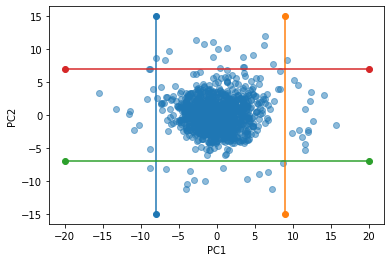

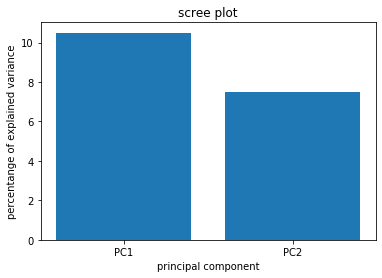

[0.10517221 0.07539336]


In [8]:
# Now do PCA shit

pca = PCA(n_components=2)
principal_components = pca.fit_transform(xtrain)
xpca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

plt.scatter(xpca['PC1'], xpca['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.plot([-8, -8], [-15, 15], marker='o')
plt.plot([9, 9], [-15, 15], marker='o')
plt.plot([-20, 20], [-7, -7], marker='o')
plt.plot([-20, 20], [7, 7], marker='o')
plt.show()


per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

print(pca.explained_variance_ratio_)

In [9]:
# Highly ad hoc way of removing outliers based on PCA plot above

outliers = (xpca['PC1'] <= 9) & (xpca['PC1'] >= -8) & (xpca['PC2'] <= 7) & (xpca['PC2'] >= -7)
print(np.count_nonzero(outliers))
xtrain_without_outliers = xtrain[outliers]
ytrain_without_outliers = ytrain[outliers]
xtrain_without_outliers.head()

1155


,x4,x12,x22,x64,x84,x93,x94,x108,x120,x129,...,x752,x757,x760,x766,x769,x786,x797,x809,x821,x830
0,1.454476,0.641522,-0.526024,-0.740642,0.199223,-0.373272,-0.236610,0.577454,-0.619985,1.033877,...,1.147683,0.869597,-0.170054,1.734303,-0.323955,0.403708,-0.628594,-0.275974,-0.008390,0.925679
1,2.265954,-1.201704,1.512451,1.073093,0.501196,0.338884,-0.554347,0.195198,0.406709,1.090254,...,-0.000024,1.726109,1.860696,-0.711604,0.498500,-1.434010,1.377539,-0.275974,0.016619,1.031616
2,1.686798,0.428108,-0.754718,1.580733,-1.178433,-0.047456,0.622922,0.656719,0.759553,0.926249,...,-0.439515,0.345276,-0.596208,0.278350,2.099532,0.965567,-1.926625,6.953003,0.936008,-0.569888
3,2.218941,-0.370244,-0.479087,-0.106118,-0.020148,-1.280235,-0.346958,-0.270578,-1.252627,1.938747,...,0.580023,0.461303,1.026596,-0.018393,-0.091943,-1.357529,-1.171589,0.152069,0.454378,0.265215
4,0.431533,-1.321807,0.435917,1.641302,-1.138132,1.700972,0.075747,-1.851014,1.525983,-0.560213,...,0.334431,0.080972,-0.909855,0.139201,0.628030,0.377739,-0.453301,1.573082,1.091439,-0.031837


In [8]:
#Lasso

x = xtrain_without_outliers.values
y = ytrain_without_outliers.values

kf = KFold(n_splits=10, shuffle = True)

alphas = np.array([0, 0.01, 0.1, 0.2, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.35, 0.4, 1, 3, 10])
meanscores = []
for i in alphas:
    scores = []
    for train_index, test_index in kf.split(x):
        X_train = x[train_index]
        X_test = x[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        clf = Lasso(alpha=i, max_iter=5000)
        clf.fit(X_train, y_train)
        
        Y_pred = clf.predict(X_test)
        scores.append(r2_score(y_test, Y_pred))
    meanscores.append(np.mean(scores))
    
meanscores

NameError: name 'xtrain_without_outliers' is not defined

In [15]:
# K-fold CV with 10 splits on different values for lambda (Ridge)

x = xtrain_without_outliers.values
y = ytrain_without_outliers.values

kf = KFold(n_splits=10, shuffle = True)

alphas = np.array([0, 0.3, 1, 3, 10, 30, 50, 100, 120, 200, 300])
meanscores = []
for i in alphas:
    scores = []
    for train_index, test_index in kf.split(x):
        X_train = x[train_index]
        X_test = x[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        clf = Ridge(alpha=i)
        clf.fit(X_train, y_train)
        
        Y_pred = clf.predict(X_test)
        scores.append(r2_score(y_test, Y_pred))
    meanscores.append(np.mean(scores))
    
meanscores

[0.6424622447489994,
 0.6513394906378386,
 0.6352932036611696,
 0.6431012695639,
 0.6455978429449114,
 0.6457407151381719,
 0.6489765495323994,
 0.6509799539989327,
 0.645965658576476,
 0.6515887910361476,
 0.6470278257759257]

In [12]:
# Regular linear regression

x = xtrain_without_outliers.values
y = ytrain_without_outliers.values

kf = KFold(n_splits=10, shuffle = True)

scores = []
for train_index, test_index in kf.split(x):
        X_train = x[train_index]
        X_test = x[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        reg_model = LinearRegression()
        reg_model.fit(X_train, y_train)
        Y_pred = reg_model.predict(X_test)
        scores.append(r2_score(y_test, Y_pred))

np.mean(scores)

0.644991067959189

In [18]:
xtest.head()

,x4,x12,x22,x64,x84,x93,x94,x108,x120,x129,...,x752,x757,x760,x766,x769,x786,x797,x809,x821,x830
0,0.366961,0.207161,0.089723,1.249686,0.640825,-0.075040,-0.760750,-1.231735,0.660534,0.610043,...,-0.165588,0.228209,1.045886,-0.343605,0.716521,1.095110,0.486149,-0.235359,0.802799,-0.897661
1,1.200475,1.532888,1.773883,-0.582201,1.073678,-0.674123,0.589974,-0.646873,-1.111694,-0.929326,...,0.609527,-0.617402,-1.121557,-0.291798,-0.073786,-0.115332,-0.475065,-0.369801,-1.506319,0.844766
2,2.012008,1.649202,1.629548,-1.151042,0.449470,0.142439,-0.033074,-1.128735,-0.913957,-0.028214,...,0.856530,-1.698646,-0.396122,0.095625,1.043549,1.076499,0.038817,2.242882,-0.306739,0.815519
3,-0.014163,1.193644,0.014570,-0.094336,1.955934,0.291232,-0.033074,0.708590,-0.464667,-1.967241,...,-0.092668,-0.763613,-0.246509,-0.337129,-0.422863,0.749299,-0.587864,-0.043044,-1.654263,-1.476280
4,0.032613,-0.770075,-0.553363,1.815444,1.909415,0.866800,-0.247206,-0.176174,1.385495,-0.595387,...,0.451775,-1.103263,-0.020240,-0.079567,2.261521,-1.023202,-0.798678,-0.127907,2.902042,-1.194072


In [19]:
# Save to csv

clf = Lasso(alpha = 0.3)
clf.fit(xtrain_without_outliers, ytrain_without_outliers)

y_pred = clf.predict(xtest)

index = pd.read_csv("sample.csv")
index['y'] = y_pred

index.to_csv("predictions2Lasso_for_feat.csv")

OK, now same as above but with a different outlier detection method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import DBSCAN
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

In [2]:
xtrain = pd.read_csv("X_train.csv")
xtrain = xtrain.iloc[:, 1:]
xtest = pd.read_csv("X_test.csv")
xtest = xtest.iloc[:, 1:]
ytrain = pd.read_csv("Y_train.csv")

xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,NaN,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,NaN,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,NaN
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,NaN,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,NaN,1.930136


In [3]:
# Treat missing values as column medians. Important (apparently) to use the medians from the training set in the test set

xtrain = xtrain.fillna(xtrain.median())
xtest = xtest.fillna(xtrain.median())
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,100215.152009,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,9.977797,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,2.292501
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,10.538567,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,104901.792534,1.930136


In [4]:
# Scale the training and test data

scaler = preprocessing.StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain_scaled, columns = xtrain.columns)
xtrain.head()

xtest_scaled = scaler.fit_transform(xtest)
xtest = pd.DataFrame(xtest_scaled, columns = xtest.columns)

In [5]:
#Remove unnecessary id column from ytrain that just ***** things up

ytrain1 = ytrain.loc[:, "y"]
ytrain2 = pd.DataFrame(data = ytrain1.values, columns= ['y'])
#ytrain2.head()
ytrain = ytrain2
ytrain.head()

,y
0,75.0
1,53.0
2,78.0
3,65.0
4,86.0


In [6]:
# Remove features with zero weight from Lasso

clf = Lasso(alpha=0.3)
clf.fit(xtrain, ytrain)

features = (clf.coef_ != 0)

xtrain = xtrain.loc[:, features]
xtest = xtest.loc[:, features]

In [18]:
xtrain["Absolute mean"] = np.absolute(xtrain).mean(axis = 1)
xtrain.head()

,x4,x12,x22,x64,x84,x93,x94,x108,x120,x129,...,x757,x760,x766,x769,x786,x797,x809,x821,x830,Absolute mean
0,1.454476,0.641522,-0.526024,-0.740642,0.199223,-0.373272,-0.236610,0.577454,-0.619985,1.033877,...,0.869597,-0.170054,1.734303,-0.323955,0.403708,-0.628594,-0.275974,-0.008390,0.925679,0.673178
1,2.265954,-1.201704,1.512451,1.073093,0.501196,0.338884,-0.554347,0.195198,0.406709,1.090254,...,1.726109,1.860696,-0.711604,0.498500,-1.434010,1.377539,-0.275974,0.016619,1.031616,1.010956
2,1.686798,0.428108,-0.754718,1.580733,-1.178433,-0.047456,0.622922,0.656719,0.759553,0.926249,...,0.345276,-0.596208,0.278350,2.099532,0.965567,-1.926625,6.953003,0.936008,-0.569888,0.975555
3,2.218941,-0.370244,-0.479087,-0.106118,-0.020148,-1.280235,-0.346958,-0.270578,-1.252627,1.938747,...,0.461303,1.026596,-0.018393,-0.091943,-1.357529,-1.171589,0.152069,0.454378,0.265215,0.779240
4,0.431533,-1.321807,0.435917,1.641302,-1.138132,1.700972,0.075747,-1.851014,1.525983,-0.560213,...,0.080972,-0.909855,0.139201,0.628030,0.377739,-0.453301,1.573082,1.091439,-0.031837,0.805025


In [38]:
#np.count_nonzero(xtrain["Absolute mean"] > 0.85)
x = xtrain[xtrain["Absolute mean"] < 0.85]
x = x.drop(["Absolute mean"], axis=1)
x.head()

,x4,x12,x22,x64,x84,x93,x94,x108,x120,x129,...,x752,x757,x760,x766,x769,x786,x797,x809,x821,x830
0,1.454476,0.641522,-0.526024,-0.740642,0.199223,-0.373272,-0.236610,0.577454,-0.619985,1.033877,...,1.147683,0.869597,-0.170054,1.734303,-0.323955,0.403708,-0.628594,-0.275974,-0.008390,0.925679
3,2.218941,-0.370244,-0.479087,-0.106118,-0.020148,-1.280235,-0.346958,-0.270578,-1.252627,1.938747,...,0.580023,0.461303,1.026596,-0.018393,-0.091943,-1.357529,-1.171589,0.152069,0.454378,0.265215
4,0.431533,-1.321807,0.435917,1.641302,-1.138132,1.700972,0.075747,-1.851014,1.525983,-0.560213,...,0.334431,0.080972,-0.909855,0.139201,0.628030,0.377739,-0.453301,1.573082,1.091439,-0.031837
6,-0.036660,-0.007466,0.036855,0.138172,-0.112458,2.103257,-1.682375,0.125008,2.010082,0.608177,...,0.159213,0.080972,2.433026,0.149947,-0.561947,-0.167011,-0.100310,-0.887822,0.111470,0.110551
8,-0.389393,0.488456,-0.201728,-0.009973,-0.479038,-1.249154,-1.455774,0.379499,-0.695547,-0.980907,...,0.420681,0.493678,0.742838,0.223970,-1.237522,1.460016,1.852793,-0.468339,-0.186732,1.355413


In [39]:
#Lasso with alpha = 0.3 and different values of the outlier parameter

kf = KFold(n_splits=10, shuffle = True)

outlier_param = np.array([1.1, 1.09, 1.08, 1.07, 1.06, 1.05, 1.04, 1.03, 1.02, 1.01, 1, 0.98, 0.96, 0.94, 0.92, 0.9])
meanscores = []
for i in outlier_param:
    x = xtrain[xtrain["Absolute mean"] < i].drop(["Absolute mean"], axis=1).values
    y = ytrain[xtrain["Absolute mean"] < i].values
    scores = []
    for train_index, test_index in kf.split(x):
        X_train = x[train_index]
        X_test = x[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        clf = Lasso(alpha=0.3, max_iter=5000)
        clf.fit(X_train, y_train)
        
        Y_pred = clf.predict(X_test)
        scores.append(r2_score(y_test, Y_pred))
    meanscores.append(np.mean(scores))
    
meanscores

[0.39631358389202626,
 0.3798309341940291,
 0.39551005128775796,
 0.3899030476409952,
 0.3853602315103709,
 0.38914714805296524,
 0.39246316701883316,
 0.39408578874526295,
 0.3915646882524771,
 0.3896368587433562,
 0.3873838416738572,
 0.37994890344287946,
 0.3857371983663966,
 0.3817585986063733,
 0.35827971752788557,
 0.36712571769717334]